## Calculate Stuff
It has been a long time since I have taken a Heat Transfer course, but thanks to google I found a formula that seems vaguely familiar. This is for one dimensional heat conduction through a material of some thickness, s. This formula can be found [here](https://www.engineeringtoolbox.com/thermal-conductivity-d_429.html).

${q} = {A}*\frac{k}{s}*\Delta{T}$


* *k*: A quick google search reveals that the thermal conductivity for ABS plastic is about 0.14 W/m-K.
* *s*: I’m estimating the thickness to be about 1/8” or roughly 3mm.
* *A*: Surface area can be calculated with the following formula for a rectangular prism.

${A} = 2*({l}*{w}+{w}*{h}+{l}*{h}) $

* *l*: 8 inches    ---> 0.2032 meters
* *w*: 6 inches    ---> 0.1524 meters
* *h*: 4.25 inches ---> 0.10795 meters

${A} = 0.1387094 m^2$

* *$\Delta{T}$*: I want to maintain a temperature of 30 degrees Fahrenheit, as that is the low end on the specifications for the Raspberry Pi. I will plan for a lowest ambient temperature of 0 degrees F so the temperature difference is going to be 30 degrees F, but in order to find the temperature difference in Celsius or Kelvin, we have to convert the nominal 30F and 0F before doing the subtraction. This will yield a ∆T of **16.67 C** or K.

## Quick Calculation

I need to figure out how many watts of heat are required in order to keep the box warm. Using the one dimensional formula above, I'll try to estimate the heat requirement. 

In [31]:
import math
import matplotlib.pyplot as plt

def q1d_calc(A, s, k, Tin_F, Tout_F):
    Tin_C = (Tin_F - 32) * (5/9)
    Tout_C = (Tout_F - 32) * (5/9)
    dT = abs(Tin_C - Tout_C)
    q = A * (k/s) * dT
    return q

A = 0.1387094 # area in square meters
s = 0.003175  # thickness in meters
k = 0.14      # thermal conductivity in W/m-K
Tin_F = 30    # internal temperature in deg F
Tout_F = 0    # external temperature in deg F

q = round(q1d_calc(A, s, k, Tin_F, Tout_F), 3)

print("q = " + str(q) + " Watts")

q = 101.939 Watts


## How many Watts required?
For my required temperature difference of 30 degrees Fahrenheit, I have an estimate of 101.939W for the enclosure.

## Temperature Test - Light Off. Can the Pi keep itself warm?
I performed this first test to see if the Raspberry Pi could keep itself warm, without any help from an external heat source. The Raspberry Pi’s documentation states that its operating range is between 0 degrees Celsius and 70 degrees Celsius. The coldest average temperature for Anchorage in January is about 14 degrees Fahrenheit, slightly below the operating range.

I let it run for about an hour in the enclosure outside and it got cold fast. The final ∆T was around 5 degrees Fahrenheit. This is likely not enough to keep the operating temp of the Pi above freezing on the coldest days.


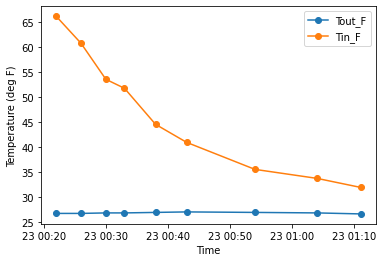

In [28]:
#Get the temperature data, copy pasted from excel sheet. Plot here in jupyter notebook.
import pandas as pd
df0 = pd.read_clipboard(parse_dates=[0], header=0)

fig, ax = plt.subplots()
ax.plot(df0['Time'], df0['External T'], marker='o', label='Tout_F')
ax.plot(df0['Time'], df0['Internal T'], marker='o', label='Tin_F')
ax.set_ylabel('Temperature (deg F)')
ax.set_xlabel('Time')
ax.legend()

In [30]:
Tin_F = 32       # internal temperature in deg F
Tout_F = 26.7    # external temperature in deg F

q = round(q1d_calc(A, s, k, Tin_F, Tout_F), 3)

print("q = " + str(q) + " Watts.")   #Generated by raspberry pi with the light bulb off.

q = 18.009 Watts.


The actual Wattage would have been lower because the temperature was still dropping at the end. I stopped it early because the Pi had reached the low end of its operating temperature and I didn't want to push it further.

## Temperature Test - Light On (60W Bulb)

![Picture1](/assets/20210201/Picture1.jpg)

I did not want to drill more holes in the enclosure yet, so I decided to use some electrical tape to secure the bulb in what seemed like a safe place. I did have some concerns about the bulb touching the wires as I felt there could be enough heat to melt their insulation. 
I plugged in the Raspberry Pi & light bulb and set it down in the corner of the deck in some snow. I could tell right away that the bulb was giving more than enough heat. It was a bit warmer outside than usual, around 31 degrees Fahrenheit, and I had hoped to do this on a colder night but decided to proceed as I am only looking for a temperature difference. 


![Picture2](/assets/20210201/Picture2.jpg)


In [36]:
#Get the data from the light-on test. Copy from Excel sheet.
df1 = pd.read_clipboard(parse_dates=[0], header=0)

Text(350, 180, 'is it on fire?')

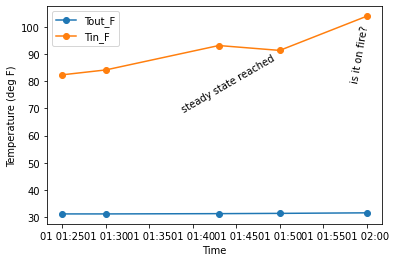

In [47]:


fig, ax = plt.subplots()
ax.plot(df1['Time'], df1['External T'], marker='o', label='Tout_F')
ax.plot(df1['Time'], df1['Internal T'], marker='o', label='Tin_F')
ax.set_ylabel('Temperature (deg F)')
ax.set_xlabel('Time')
ax.legend()

plt.annotate(xycoords='figure pixels', xy=(180,150), text='steady state reached', rotation=30)
plt.annotate(xycoords='figure pixels', xy=(350,180), text='is it on fire?', rotation=80)

Right away I saw the temperature difference is more than I had calculated; about 1.5 times more. While monitoring the temperature, it had reached a point where I estimated that the enclosure had reached a steady state. I decided to give it a few more minutes and then suddenly the temperature jumped by more than ten degrees. I got worried and ran outside to unplug everything.